In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read the 75 PCA dimension dataframe
df = pd.read_csv('2YPCAfeatures.csv')

#Read NBCI and worldometer features and fastahead
dfY = pd.read_csv('2YJapanCovid.csv', index_col=[0])
print(dfY.shape)
acc = pd.read_csv('2Yfastahead', header=None)
print(acc)

(3392, 6)
             0
0          acc
1     BS001453
2     BS001465
3     LC633760
4     BS002199
...        ...
3388  BS003359
3389  BS003610
3390  BS003539
3391  BS003328
3392  BS003548

[3393 rows x 1 columns]


In [8]:
#Two dimensional tSNE analysis
x = StandardScaler().fit_transform(df)
tsne = TSNE(n_components=2, perplexity=40)
df2 = tsne.fit_transform(x)

#Make a data frame of the two t-SNE dimensions 
dftsne2 = pd.DataFrame(df2, columns=['D1', 'D2'])

In [9]:
#add fastaheads to the 2D t-SNE dataframe
dftsne2["acc"]= acc
print(dftsne2.head())

#Merge the NBCI and worldometer data on t-SNE dimensions by sequence name, that is, by 'acc'
df_merged2 = pd.merge(dfY,dftsne2, on='acc')

#add column deaths/cases
df_merged2['DdivC'] = (df_merged2['deaths']/df_merged2['cases'])

df_merged2.sort_values('deaths')

print(df_merged2.shape)
print(df_merged2.describe())

          D1         D2       acc
0 -10.705501  42.119659       acc
1 -10.585023  42.291756  BS001453
2 -10.414352  42.519119  BS001465
3  25.391317   5.265177  LC633760
4  25.424562   5.259883  BS002199
(3387, 9)
              cases       deaths           D1           D2        DdivC
count  3.387000e+03  3387.000000  3387.000000  3387.000000  3387.000000
mean   6.014129e+05  1005.663419    -1.213374    -0.484973     0.008479
std    5.985068e+05  1161.887351    27.341282    33.296021     0.018175
min    1.880000e+02     4.000000   -73.550163   -53.496059     0.000396
25%    8.374600e+04   371.000000   -20.332973   -32.828154     0.000396
50%    5.563040e+05   444.000000     0.459540     0.955125     0.002053
75%    9.363130e+05  1081.000000    20.069378    24.553696     0.008132
max    2.281011e+06  4682.000000    92.875481    70.456238     0.166606


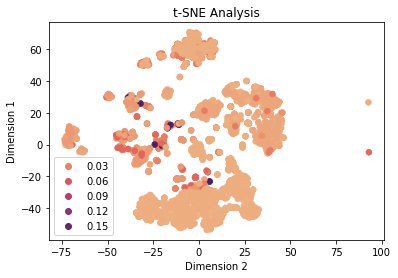

In [10]:
#Form a 2D scatter plot

sns.scatterplot(x='D1', y='D2', data=df_merged2, hue='DdivC', hue_norm=(0,0.1666), palette='flare', ec="face")
plt.ylabel('Dimension 1')
plt.xlabel('Dimension 2')
plt.title('t-SNE Analysis')
plt.legend()
plt.show()

In [11]:
#3D tSNE-analysis
tsne = TSNE(n_components=3, perplexity=40)
df3 = tsne.fit_transform(x)

#Make a data frame of the two t-SNE dimensions 
dftsne3 = pd.DataFrame(df3, columns=['D1', 'D2', 'D3'])


In [12]:
#add fastaheads to the 2D t-SNE dataframe
dftsne3["acc"]= acc
print(dftsne3.head())

#Merge the NBCI and worldometer data on t-SNE dimensions by sequence name, that is, by 'acc'
df_merged3 = pd.merge(dfY,dftsne3, on='acc')

#add column deaths/cases
df_merged3['DdivC'] = (df_merged3['deaths']/df_merged3['cases'])

df_merged3.sort_values('deaths')

print(df_merged3.shape)
print(df_merged3.describe())

          D1        D2        D3       acc
0 -10.614220  8.517408 -0.735247       acc
1 -10.559621  8.657464 -0.655919  BS001453
2 -10.503730  8.815157 -0.545898  BS001465
3   1.915900  1.766770 -6.509870  LC633760
4   1.933092  1.778935 -6.504774  BS002199
(3387, 10)
              cases       deaths           D1           D2           D3  \
count  3.387000e+03  3387.000000  3387.000000  3387.000000  3387.000000   
mean   6.014129e+05  1005.663419    -0.023044    -0.064281     0.134414   
std    5.985068e+05  1161.887351     8.097119     9.256064     8.461763   
min    1.880000e+02     4.000000   -61.052181   -18.985239   -33.054821   
25%    8.374600e+04   371.000000    -5.632056    -6.751333    -5.855595   
50%    5.563040e+05   444.000000     0.848730    -0.344756    -0.019257   
75%    9.363130e+05  1081.000000     5.982182     6.403456     7.449121   
max    2.281011e+06  4682.000000    16.377832   100.184357    19.562578   

             DdivC  
count  3387.000000  
mean      0.0

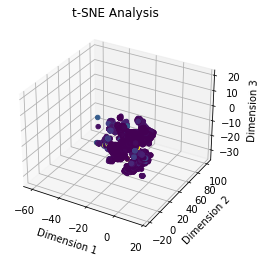

In [13]:
#form a 3D scatterplot
ax = plt.axes(projection ="3d")
ax.scatter(df_merged3.D1, df_merged3.D2, df_merged3.D3, marker='o', alpha=1, c=df_merged3.DdivC)
ax.set_ylabel('Dimension 2')
ax.set_xlabel('Dimension 1')
ax.set_zlabel('Dimension 3')
ax.set_title('t-SNE Analysis')
plt.show()